In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
# display formatting for floats
pd.options.display.float_format = '{:,.2f}'.format

In [39]:
raw = pd.read_csv('bored_apes.csv', parse_dates=['SaleDate']).rename(columns={'index': 'TokenId'})
# Bored Ape #225 has a sale of 0 USD (transfer to same owner with address labelled Vault)
# not sure why transfer style activity sometimes gets labelled as a sale
df = raw.loc[(raw['USDPrice'] != 0) & (~raw['LastSalePrice'].isna())]
df = df.sort_values(['SaleDate']).reset_index(level=0, drop=True)  # sort by sale date and time

In [40]:
raw.describe()

,TokenId,LastSalePrice,BackgroundRarity,EarringRarity,FurRarity,EyesRarity,MouthRarity,ClothesRarity,HatRarity,NumberOfSales,USDPrice
count,"10,000.00","8,388.00","10,000.00","2,977.00","10,000.00","10,000.00","10,000.00","8,114.00","7,744.00","8,388.00","8,388.00"
mean,"4,999.50",67.35,0.13,0.06,0.08,0.07,0.10,0.02,0.03,2.71,"72,177.48"
std,"2,886.90","3,348.31",0.00,0.03,0.04,0.05,0.08,0.01,0.01,1.81,"123,253.95"
min,0.00,0.00,0.12,0.01,0.00,0.00,0.00,0.00,0.01,1.00,0.00
25%,"2,499.75",1.00,0.12,0.04,0.05,0.04,0.03,0.02,0.02,1.00,"4,112.52"
50%,"4,999.50",5.00,0.13,0.08,0.06,0.05,0.07,0.02,0.03,2.00,"20,550.55"
75%,"7,499.25",33.00,0.13,0.09,0.14,0.08,0.16,0.03,0.03,4.00,"135,592.53"
max,"9,999.00","267,500.00",0.13,0.09,0.14,0.17,0.23,0.04,0.06,15.00,"3,149,016.55"


In [41]:
raw

,TokenId,LastSalePrice,Background,BackgroundRarity,Earring,EarringRarity,Fur,FurRarity,Eyes,EyesRarity,Mouth,MouthRarity,Clothes,ClothesRarity,Hat,HatRarity,LastSaleToken,NumberOfSales,SaleDate,USDPrice
0,0,NaN,Orange,0.13,Silver Hoop,0.09,Robot,0.03,X Eyes,0.02,Discomfort,0.02,Striped Tee,0.04,NaN,NaN,NaN,NaN,NaT,NaN
1,1,NaN,Orange,0.13,NaN,NaN,Robot,0.03,Blue Beams,0.00,Grin,0.07,Vietnam Jacket,0.02,NaN,NaN,NaN,NaN,NaT,NaN
2,2,NaN,Aquamarine,0.13,NaN,NaN,Robot,0.03,3d,0.05,Bored Cigarette,0.07,NaN,NaN,Sea Captain's Hat,0.03,NaN,NaN,NaT,NaN
3,3,NaN,Purple,0.13,NaN,NaN,Cheetah,0.04,Bored,0.17,Tongue Out,0.02,Bone Necklace,0.02,NaN,NaN,NaN,NaN,NaT,NaN
4,4,NaN,Blue,0.12,NaN,NaN,Golden Brown,0.08,Closed,0.07,Phoneme L,0.02,Navy Striped Tee,0.03,Party Hat 2,0.01,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.40,Gray,0.12,NaN,NaN,Pink,0.05,Closed,0.07,Bored,0.23,Smoking Jacket,0.02,NaN,NaN,Wrapped Ether,2.00,2021-05-22 06:53:05.780166,"1,644.41"
9996,9996,0.39,New Punk Blue,0.12,Silver Hoop,0.09,Dark Brown,0.14,3d,0.05,Dumbfounded,0.05,Guayabera,0.02,NaN,NaN,Ether,2.00,2021-05-22 06:22:52.431550,"1,602.94"
9997,9997,20.00,Purple,0.13,NaN,NaN,Black,0.12,Bored,0.17,Grin Multicolored,0.01,Sailor Shirt,0.03,Halo,0.03,Ether,2.00,2021-08-04 09:22:33.185097,"82,202.20"
9998,9998,21.20,Yellow,0.13,NaN,NaN,Brown,0.14,Heart,0.04,Bored Unshaven Cigarette,0.04,Bayc T Red,0.01,NaN,NaN,Ether,3.00,2021-08-20 14:56:29.874666,"87,134.33"


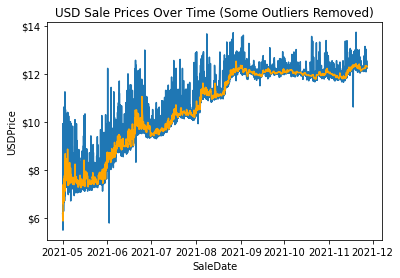

In [42]:
ts = df.groupby('SaleDate').agg({'USDPrice': 'mean'})
ts_outrm = ts.loc[ts['USDPrice'] < 10e5]
# Rolling median for outlier robustness
log_price = np.log(ts_outrm['USDPrice'])
rolling_median = log_price.rolling(window=14).median()

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter('${x:,.0f}')
sns.lineplot(x='SaleDate', y=log_price, data=ts_outrm)
sns.lineplot(x=ts_outrm.index, y=rolling_median, color='orange') \
    .set_title('USD Sale Prices Over Time (Some Outliers Removed)')
plt.show()

In [43]:
df['LogUSDPrice'] = np.log(df['USDPrice'])
mean = df['LogUSDPrice'].ewm(span=14).mean()  # exponentially weighted moving average with 14 point window
std = df['LogUSDPrice'].ewm(span=14).std()

mean_plus_std = mean + 1.7*std  # 1.7 worked well
# mean_minus_std = mean - 2*std

# is_outlier = (df['LogUSDPrice'] > mean_plus_std) | (df['LogUSDPrice'] < mean_minus_std)
is_outlier = df['LogUSDPrice'] > mean_plus_std
df['Outlier'] = 1
df.loc[is_outlier, 'Outlier'] = -1

In [44]:
dfo, dfi = df[is_outlier].copy(), df[~is_outlier].copy()
dfs = dfo, dfi
for data in dfs:
    rolling_median = data['LogUSDPrice'].rolling(window=7, min_periods=1).median()
    ewm = data['LogUSDPrice'].ewm(span=14).mean()
    data['LogUSDPriceEWM'] = (rolling_median + ewm) / 2
    # Percentage Extension from the Exponential Weighted Moving Average
    data['PctExtensionEWM'] = data.apply(lambda x: (x['LogUSDPrice'] - x['LogUSDPriceEWM']) / x['LogUSDPriceEWM'], axis=1)

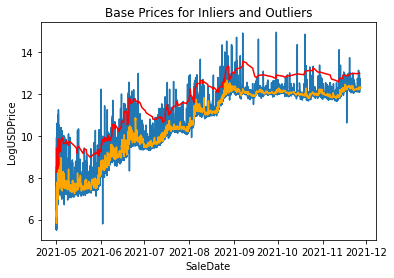

In [45]:
fig, ax = plt.subplots()
sns.lineplot(x='SaleDate', y='LogUSDPrice', data=df)
sns.lineplot(x='SaleDate', y='LogUSDPriceEWM', color='orange', data=dfi)
sns.lineplot(x='SaleDate', y='LogUSDPriceEWM', color='red', data=dfo)
ax.set_title('Base Prices for Inliers and Outliers')
plt.show()

In [46]:
rarity_cols = [c for c in df.columns if 'Rarity' in c]  # get all numeric rarity related cols
# clean up na's in rarity cols
def fill_trait_na(col) -> float:
    """Calculate the missing data in trait rarity columns"""
    fill_value = 1 - col.dropna().unique().sum()
    return fill_value

for data in dfs:
    data[rarity_cols] = data[rarity_cols].apply(lambda x: x.fillna(fill_trait_na(x)))

In [47]:
traits = ['Background', 'Earring', 'Fur', 'Eyes', 'Mouth', 'Clothes', 'Hat']
for data in dfs:
    data[traits] = data[traits].fillna('None')

In [48]:
def has_two_less_1pct(row, cols):
    """Retruns true if the NFT has at least two traits with rarities less than 1%"""
    rarity = row[cols].values
    n = len(rarity[np.where(rarity < 0.01)])
    if n> 1:
        return 1
    return 0

def has_rare_clothes_or_fur(row):
    """Return true if the NFT has clothes or fur with a rarity of less than 1%"""
    if row['ClothesRarity'] < 0.01 or row['FurRarity'] < 0.01:
        return 1
    return 0

def has_blacksuit_or_gold_fur(row):
    """Return true if the NFT has Black Suit for clothes or Solid Gold fur"""
    if row['Clothes'] == 'Black Suit' or row['Fur'] == 'Solid Gold':
        return 1
    return 0

from collections import Counter
def find_matches(row, categories):
    traits = row[categories].values
    keywords = []
    for trait in traits:
        split = trait.split(' ')
        for word in split:
            keywords.append(word)
    if 'None' in keywords:
        keywords.remove('None')
    counts = Counter(keywords)
    most_common = counts.most_common(1)
    matches = most_common[0][1] - 1
    if matches:
        return 1
    return 0

for data in dfs:
    data['HasTwoLess1Pct'] = data.apply(lambda x: has_two_less_1pct(x, rarity_cols), axis=1)
    data['HasRareClothesOrFur'] = data.apply(has_rare_clothes_or_fur, axis=1)
    data['HasBlackSuitOrGoldFur'] = data.apply(has_blacksuit_or_gold_fur, axis=1)
    data['HasMatches'] = data.apply(lambda x: find_matches(x, traits), axis=1)

In [49]:
for data in dfs:
    data.loc[(data['HasTwoLess1Pct']==1) | (data['HasRareClothesOrFur']==1) | (data['HasBlackSuitOrGoldFur']==1), 'OutlierRule'] = -1
    data['OutlierRule'] = data['OutlierRule'].fillna(1)

Text(0.5, 1.0, 'Distribution of Extension from EWM Outliers')

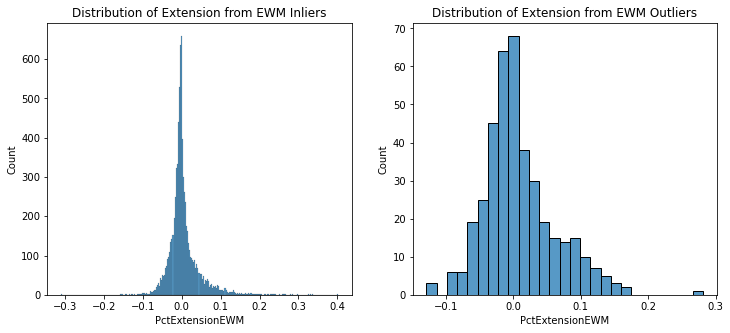

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.histplot(dfi['PctExtensionEWM'], ax=ax1)
ax1.set_title('Distribution of Extension from EWM Inliers')
sns.histplot(dfo['PctExtensionEWM'], ax=ax2)
ax2.set_title('Distribution of Extension from EWM Outliers')

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [52]:
categorical_feature_cols = [
    'Background',
    'Earring',
    'Mouth',
    'Clothes',
    'Hat',
    'Fur',
    'Eyes',
]
clf_features = ['HasTwoLess1Pct', 'HasRareClothesOrFur', 'HasBlackSuitOrGoldFur', 'HasMatches']

In [53]:
# encode outlier data
enc = OneHotEncoder(handle_unknown='ignore')

# regression encoded dataframe
enc_df = pd.DataFrame(enc.fit_transform(dfo[categorical_feature_cols]).toarray())
enc_df.index = list(enc_df.index)  # convert index to int64 index

# add labels
enc_df.columns = enc.get_feature_names_out()

# merge and drop
dfp = dfo.reset_index(drop=True).merge(enc_df.reset_index(drop=True), left_index=True, right_index=True)
dfo = dfp.drop(columns=categorical_feature_cols)

In [54]:
# encode inlier data
enc = OneHotEncoder(handle_unknown='ignore')

# regression encoded dataframe
enc_df = pd.DataFrame(enc.fit_transform(dfi[categorical_feature_cols]).toarray())

# add labels
enc_df.columns = enc.get_feature_names_out()

# merge and drop
dfp = dfi.reset_index(drop=True).merge(enc_df.reset_index(drop=True), left_index=True, right_index=True)
dfi = dfp.drop(columns=categorical_feature_cols)

In [55]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor, LassoCV, Lasso
from sklearn.metrics import confusion_matrix

In [56]:
df = pd.concat([dfi, dfo])

In [57]:
features = [feature for feature in df.columns if '_' in feature]
features.extend(['HasMatches', 'NumberOfSales'])

In [58]:
X = df.loc[:, features+['OutlierRule', 'Outlier']]
y = df['PctExtensionEWM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
X_train_in = X_train[X_train['Outlier']==1].drop(columns=['OutlierRule', 'Outlier'])
y_train_in = y_train[X_train['Outlier']==1]

In [60]:
X_train_out = X_train[X_train['Outlier']==-1].drop(columns=['OutlierRule', 'Outlier'])
y_train_out = y_train[X_train['Outlier']==-1]

In [61]:
from typing import List
def model_selection(models: List[dict], scores: List[str], X_train, y_train) -> dict:
    """Find the best model"""
    results = {}
    for candidate in models:
        model = GridSearchCV(
            candidate['constructor'], param_grid=candidate['param_grid'], scoring=scores
        )
        model.fit(X_train, y_train)
        mean_test_score = model.cv_results_['mean_test_score'].mean()
        results[candidate['name']] = mean_test_score
    print("The winner is: {}".format(
        max(results, key=results.get)
    ))
    return results

In [62]:
models = [
    {
        'name': 'Lasso',
        'constructor': Lasso(),
        'param_grid': {'alpha': [0.2, 0.4, 0.6, 0.8, 1.0]}
    },
    {
        'name': 'RandomForest',
        'constructor': RandomForestRegressor(random_state=0),
        'param_grid': {}
    },
    {
        'name': 'Huber',
        'constructor': HuberRegressor(),
        'param_grid': {'epsilon': [10], 'max_iter': [1000]}
    }
]
model_selection(models, 'neg_root_mean_squared_error', X_train, y_train)

The winner is: Huber


{'Lasso': -0.04074982814853694,
 'RandomForest': -0.03276481129242102,
 'Huber': -0.030848885819394933}

In [63]:
from sklearn.ensemble import VotingRegressor

In [64]:
estimators = [('randomforest', RandomForestRegressor(random_state=42, n_estimators=200)),
              ('linear', LassoCV(random_state=42)),
              ('huber', HuberRegressor(epsilon=2, max_iter=1000))]

In [65]:
vreg_in, vreg_out = VotingRegressor(estimators),  VotingRegressor(estimators)

In [66]:
cross_validate(vreg_in, X_train_in, y_train_in, cv=3,
               scoring=('neg_mean_squared_error'),
               return_train_score=True)

{'fit_time': array([14.10438728, 13.67848611, 13.14692783]),
 'score_time': array([0.112782  , 0.11485791, 0.1157372 ]),
 'test_score': array([-0.00084114, -0.00086691, -0.00082491]),
 'train_score': array([-0.00048787, -0.00046959, -0.00048149])}

In [67]:
vreg_in.fit(X_train_in, y_train_in)
vreg_out.fit(X_train_out, y_train_out)

VotingRegressor(estimators=[('randomforest',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=42)),
                            ('linear', LassoCV(random_state=42)),
                            ('huber',
                             HuberRegressor(epsilon=2, max_iter=1000))])

In [68]:
def predict(X, models: dict):
    """Custom prediction function to combine two regression models"""
    outliers = X['OutlierRule'] == -1
    X_o = X.loc[outliers].drop(columns=['OutlierRule', 'Outlier'])
    X_i = X.loc[~outliers].drop(columns=['OutlierRule', 'Outlier'])
    y = np.empty(X.shape[0])  # store combined predictions
    # predict target values separately accorindg to the two models
    
    if X_o.shape[0]:
        y_o_pred = models['o'].predict(X_o)
        y[outliers] = y_o_pred
    if X_i.shape[0]:
        y_i_pred = models['i'].predict(X_i)
        y[~outliers] = y_i_pred
    
    return y

In [69]:
y_actual, y_pred = y_test, predict(X_test, {'o': vreg_out, 'i': vreg_in})

In [70]:
predict_df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_pred})
from sklearn import metrics
-metrics.mean_squared_error(y_test, y_pred)

-0.00110687138752163

In [76]:
predicted_merged = df.merge(predict_df, how='left', left_index=True, right_index=True)
predicted_merged = predicted_merged.loc[~predicted_merged['Predicted'].isna()]

cols = predicted_merged.columns[0:]
pm = predicted_merged.loc[:, ['TokenId', 'SaleDate', 'LogUSDPriceEWM', 'Actual', 'Predicted', 'USDPrice', 'PctExtensionEWM']]

pm['PredictedUSDPrice'] = np.exp(pm['LogUSDPriceEWM'] * (1 + pm['Predicted']))

pm.sample(20)

,TokenId,SaleDate,LogUSDPriceEWM,Actual,Predicted,USDPrice,PctExtensionEWM,PredictedUSDPrice
3805,3120,2021-06-21 15:48:43.213103,10.34,0.03,0.00,"40,943.60",0.03,"31,457.03"
4696,3501,2021-07-17 03:36:51.447150,10.46,0.01,0.03,"40,540.00",0.01,"45,913.73"
5808,4542,2021-08-20 21:46:10.215377,11.43,-0.02,-0.01,"74,922.85",-0.02,"81,635.90"
3473,1769,2021-06-18 12:05:10.732199,9.36,-0.01,0.01,"10,237.38",-0.01,"12,497.21"
1839,4827,2021-05-24 02:09:16.881414,7.61,-0.03,0.01,"1,646.66",-0.03,"2,151.77"
1201,389,2021-05-03 23:49:53.093683,7.97,-0.04,-0.02,"2,021.80",-0.04,"2,474.66"
84,8941,2021-05-01 09:50:57.229948,6.93,0.23,0.08,"5,055.44",0.23,"1,817.43"
362,4961,2021-05-01 22:36:37.197596,7.34,0.01,0.05,"4,116.64",0.13,"2,259.38"
7708,1294,2021-11-16 04:34:53.653953,12.26,-0.00,-0.01,"204,747.50",-0.00,"193,055.69"
5457,6174,2021-08-06 08:24:41.954596,11.24,-0.01,-0.01,"65,866.24",-0.01,"71,610.08"


In [78]:
pm['Accuracy'] = 1 - abs(pm['PredictedUSDPrice'] - pm['USDPrice']) / ((pm['PredictedUSDPrice'] + pm['USDPrice']) / 2)

In [79]:
pm.sort_values('Accuracy', ascending=False).tail(10)

,TokenId,SaleDate,LogUSDPriceEWM,Actual,Predicted,USDPrice,PctExtensionEWM,PredictedUSDPrice,Accuracy
18,6833,2021-05-01 22:25:32.729835,9.00,0.00,0.17,"8,233.28",0.00,"38,731.53",-0.30
672,4749,2021-05-02 16:37:23.040381,7.76,0.16,-0.04,"8,233.28",0.16,"1,693.81",-0.32
7946,4734,2021-11-22 12:43:00.966301,12.23,0.04,0.17,"329,898.40",0.04,"1,623,778.66",-0.32
253,185,2021-08-02 01:02:58.091324,11.95,-0.00,0.13,"145,569.60",-0.00,"755,634.31",-0.35
66,8350,2021-05-01 09:17:57.379578,6.60,-0.04,0.00,"4,075.47",0.26,748.75,-0.38
334,3749,2021-09-06 21:02:49.694425,13.57,-0.06,-0.03,"3,030,263.00",0.10,"556,120.24",-0.38
113,7318,2021-05-01 10:35:01.916004,6.81,0.06,0.19,617.08,-0.06,"3,364.82",-0.38
252,4281,2021-08-01 16:34:16.375162,12.24,-0.03,0.12,"143,323.25",-0.03,"856,351.47",-0.43
6635,7130,2021-09-03 07:07:08.242456,12.23,0.03,0.17,"283,554.16",0.03,"1,721,260.73",-0.43
349,2087,2021-09-30 01:29:04.799542,12.91,-0.02,-0.01,"3,149,016.55",0.16,"350,385.78",-0.60


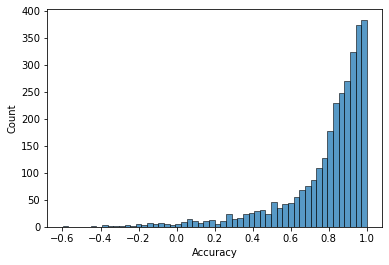

In [80]:
fig, ax = plt.subplots()
ax = sns.histplot(pm['Accuracy'])
plt.show()

In [81]:
def valuate(token_id, df, features):
    token_data = df.loc[df['TokenId']==token_id, features+['OutlierRule', 'Outlier']]
    current_price_ewm = df.sort_values('SaleDate', ascending=False)['LogUSDPriceEWM'].iloc[0]
    y_pred = predict(token_data,  {'o': vreg_out, 'i': vreg_in})
    return float(np.exp(current_price_ewm * (1 + y_pred)))

In [83]:
valuate(2342, df, features)

192151.85612881073

In [84]:
nosales = raw.loc[raw['NumberOfSales'].isna()].copy()
nosales['NumberOfSales'] = nosales['NumberOfSales'].fillna(0)
nosales[traits] = nosales[traits].fillna('None')

In [85]:
nosales['HasTwoLess1Pct'] = nosales.apply(lambda x: has_two_less_1pct(x, rarity_cols), axis=1)
nosales['HasRareClothesOrFur'] = nosales.apply(has_rare_clothes_or_fur, axis=1)
nosales['HasBlackSuitOrGoldFur'] = nosales.apply(has_blacksuit_or_gold_fur, axis=1)
nosales.loc[(nosales['HasTwoLess1Pct']==1) | (nosales['HasRareClothesOrFur']==1) | (nosales['HasBlackSuitOrGoldFur']==1), 'OutlierRule'] = -1
nosales['OutlierRule'] = nosales['OutlierRule'].fillna(1)
nosales['HasMatches'] = nosales.apply(lambda x: find_matches(x, traits), axis=1)
nosales['Outlier'] = 0  # will get dropped by predict function

In [86]:
# encode data
enc = OneHotEncoder(handle_unknown='ignore')

# regression encoded dataframe
enc_df = pd.DataFrame(enc.fit_transform(nosales[categorical_feature_cols]).toarray())

# add labels
enc_df.columns = enc.get_feature_names_out()

# merge and drop
nosales_p = nosales.reset_index(drop=True).merge(enc_df.reset_index(drop=True), left_index=True, right_index=True)
X = nosales_p.drop(columns=categorical_feature_cols)

In [87]:
X = X[features+['OutlierRule', 'Outlier']].copy()

In [88]:
predictions = predict(X,  {'o': vreg_out, 'i': vreg_in})

In [89]:
current_price_ewm = df.sort_values('SaleDate', ascending=False)['LogUSDPriceEWM'].iloc[0]
nosales['Prediction'] = predictions
nosales['PredictedUSDPrice'] = np.exp(current_price_ewm * (1 + nosales['Prediction']))

In [90]:
X = X_train.drop(columns=['OutlierRule', 'Outlier'])
forest = RandomForestRegressor(n_estimators=200).fit(X, y_train)

In [91]:
importance = pd.DataFrame({'Importance': forest.feature_importances_}, index=X.columns)
top_importance = importance.sort_values('Importance', ascending=False).head(15)
bottom_importance = importance.sort_values('Importance').head(15)

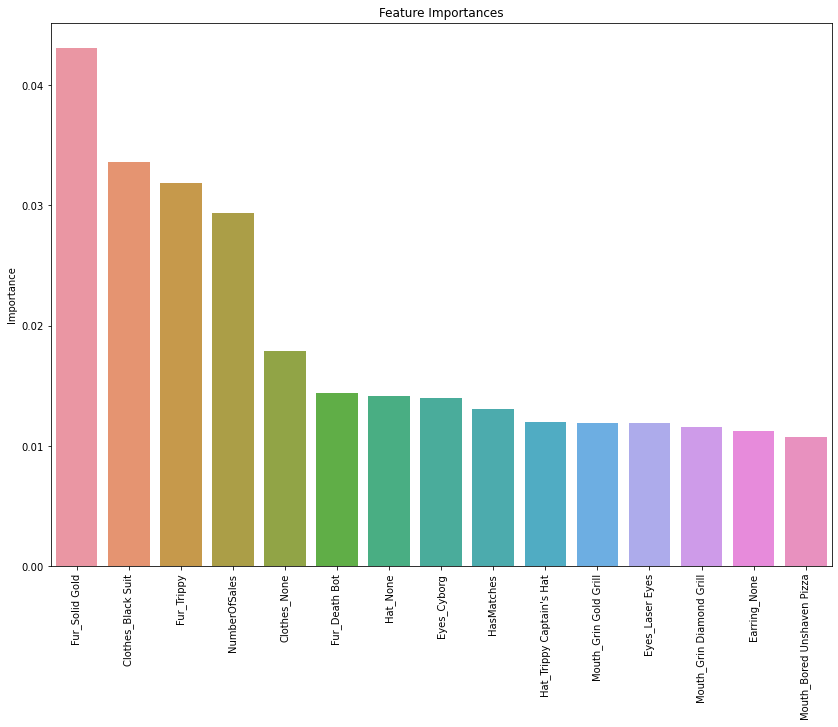

In [92]:
fig, ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x=top_importance.index, y='Importance', data=top_importance)
ax.set_title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

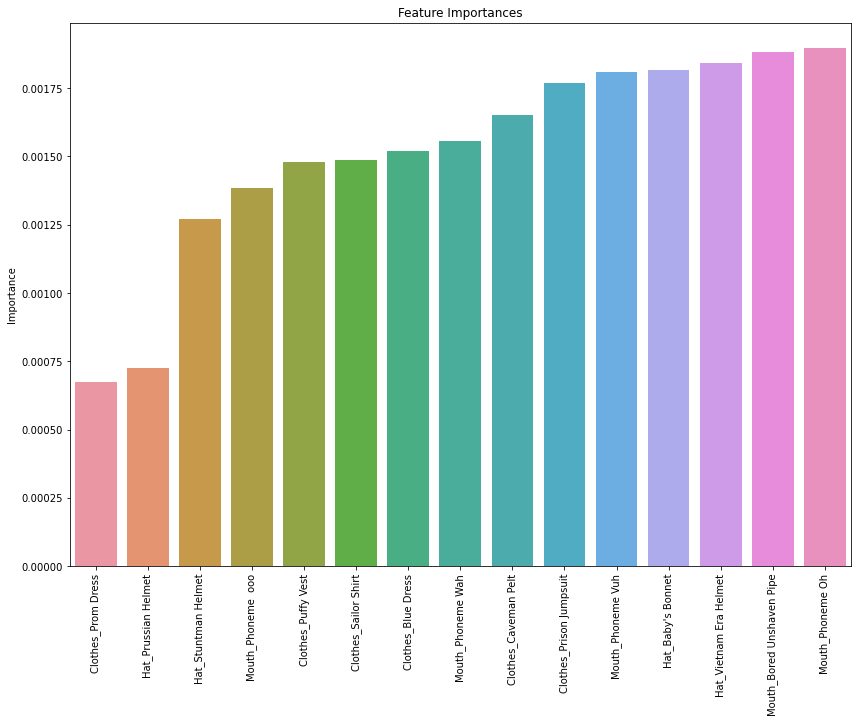

In [93]:
fig, ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x=bottom_importance.index, y='Importance', data=bottom_importance)
ax.set_title('Feature Importances')
plt.xticks(rotation=90)
plt.show()